<a href="https://colab.research.google.com/github/darman1725/BeautyCare/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UAS - PENGOLAHAN CITRA DIGITAL DAN VISI KOMPUTER

PENYAKIT TANAMAN PADI (Rice Leaf Diseases)

KELAS TI_3I

KELOMPOK : 6

1.   Fayyadh Al Baity 
2.   M Fajrin
3.   Muhammad Videla R. D.



Langkah - langkah :

1. Langkah awal adalah melakukan import library yang akan dibutuhkan dalam melakukan proses pendeteksi penyakit pada padi.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from math import log10, sqrt
from PIL import Image
import glob

2.  Kemudian import folder yang ada di Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


3. membuat direktori data training dan membuat dalam list folder

In [3]:
# direktori data training
Images = '/content/drive/MyDrive/rice_leaf_diseases'

# List folder
os.listdir(Images)

['Leaf smut', 'Bacterial leaf blight', 'Brown spot']

4. menyimpan gambar ke folder data training.

In [4]:
# simpan gambar ke leaf_smut untuk kategori leaf smut
img_leafsmut = []
for img_smut in glob.glob('/content/drive/MyDrive/rice_leaf_diseases/Leaf smut/*'):
  n = cv2.imread(img_smut)
  img_leafsmut.append(n)

print(len(img_leafsmut))

40


In [5]:
# simpan gambar ke bacterial untuk kategori leaf bacterial
img_bacterial = []
for img_bact in glob.glob('/content/drive/MyDrive/rice_leaf_diseases/Bacterial leaf blight/*'):
  n = cv2.imread(img_bact)
  img_bacterial.append(n)

print(len(img_bacterial))

40


In [6]:
# simpan gambar ke brown_spot untuk kategori brown spot
img_brown_spot = []
for img_brown in glob.glob('/content/drive/MyDrive/rice_leaf_diseases/Brown spot/*'):
  n = cv2.imread(img_brown)
  img_brown_spot.append(n)
  
print(len(img_brown_spot))

40


In [7]:
# baik disini kita berikan gaussian smoothing untuk melakukan perbaikan pada kualitas citra supaya hasilnya lebih baik
# kita lakukan pengubahan citra ke graysclae
# hasil dari ketiga data folder diatas akan di ambil untuk melakukan perbaikan citra
leafsmut_gaussian = []
bacterial_gaussian = []
brownspot_gaussian = []

for i in range(len(img_leafsmut)):
  leafsmut_gaussian = cv2.GaussianBlur(img_leafsmut[i],(3,3),0)
  gray_leafsmut = cv2.cvtColor(leafsmut_gaussian, cv2.COLOR_BGR2GRAY)

  # lakukan Deteksi Tepi Sobel
  # dan lakukan pemfilteran untuk mendapatkan hasil dari Sobel horizontal dan vertikal dari data gambar yang ada
  smut_sobelx = cv2.Sobel(gray_leafsmut, cv2.CV_64F, 1, 0, ksize=3)
  smut_sobely = cv2.Sobel(gray_leafsmut, cv2.CV_64F, 0, 1, ksize=3)

  # hasil data gambar kernel Sobel horizontal dan vertikal diterapkan
  smut_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(smut_sobelx), 0.5, cv2.convertScaleAbs(smut_sobely), 0.5, 0)

In [8]:
for i in range(len(img_bacterial)):
  bacterial_gaussian = cv2.GaussianBlur(img_bacterial[i],(3,3),0)
  gray_bacterial = cv2.cvtColor(bacterial_gaussian, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  bact_sobelx = cv2.Sobel(gray_bacterial, cv2.CV_64F, 1, 0, ksize=3)
  bact_sobely = cv2.Sobel(gray_bacterial, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  bact_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(bact_sobelx), 0.5, cv2.convertScaleAbs(bact_sobely), 0.5, 0)

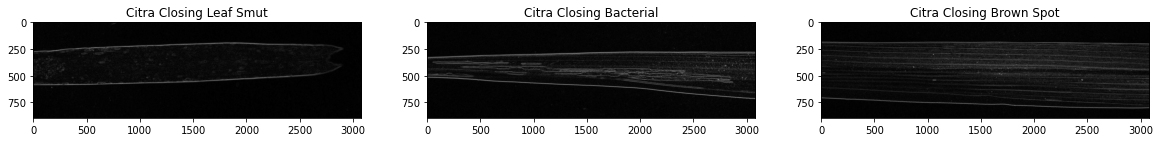

897


In [9]:
for i in range(len(img_brown_spot)):
  brownspot_gaussian = cv2.GaussianBlur(img_brown_spot[i],(3,3),0)
  gray_brownspot = cv2.cvtColor(brownspot_gaussian, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  brownspot_sobelx = cv2.Sobel(gray_brownspot, cv2.CV_64F, 1, 0, ksize=3)
  brownspot_sobely = cv2.Sobel(gray_brownspot, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  brownspot_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(brownspot_sobelx), 0.5, cv2.convertScaleAbs(brownspot_sobely), 0.5, 0)

f, axarr = plt. subplots(1,3,figsize=(20,20))
plt.subplot(131),plt.imshow(smut_sobelxy, cmap = 'gray'), plt.title('Citra Closing Leaf Smut')
plt.subplot(132),plt.imshow(bact_sobelxy,cmap = 'gray'), plt.title('Citra Closing Bacterial')
plt.subplot(133),plt.imshow(brownspot_sobelxy,cmap = 'gray'), plt.title('Citra Closing Brown Spot')
plt.show()

print(len(bact_sobelxy))